<a href="https://colab.research.google.com/github/Stereo-Alex/Frutavision/blob/main/Workbook_messy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle
from google.colab import files
files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [2]:
!kaggle datasets download -d chrisfilo/fruit-recognition

100% 7.91G/7.92G [03:04<00:00, 64.1MB/s]
100% 7.92G/7.92G [03:04<00:00, 46.0MB/s]


In [4]:
!mkdir fruit
!unzip fruit-recognition.zip -d fruit
#!unzip fruit-recognition.zip 

Streaming output truncated to the last 5000 lines.
  inflating: fruit/Pomegranate/Pomegranet00322.png  
  inflating: fruit/Pomegranate/Pomegranet00323.png  
  inflating: fruit/Pomegranate/Pomegranet00324.png  
  inflating: fruit/Pomegranate/Pomegranet00325.png  
  inflating: fruit/Pomegranate/Pomegranet00326.png  
  inflating: fruit/Pomegranate/Pomegranet00327.png  
  inflating: fruit/Pomegranate/Pomegranet00328.png  
  inflating: fruit/Pomegranate/Pomegranet00329.png  
  inflating: fruit/Pomegranate/Pomegranet0033.png  
  inflating: fruit/Pomegranate/Pomegranet00330.png  
  inflating: fruit/Pomegranate/Pomegranet00331.png  
  inflating: fruit/Pomegranate/Pomegranet00332.png  
  inflating: fruit/Pomegranate/Pomegranet00333.png  
  inflating: fruit/Pomegranate/Pomegranet00334.png  
  inflating: fruit/Pomegranate/Pomegranet00335.png  
  inflating: fruit/Pomegranate/Pomegranet00336.png  
  inflating: fruit/Pomegranate/Pomegranet00337.png  
  inflating: fruit/Pomegranate/Pomegranet00338.pn

# Creating a df with the paths

In [5]:
import pandas as pd
import numpy as np
import os 
import cv2
import matplotlib.pyplot as plt

In [6]:
data_folder = '/content/fruit/'
paths = os.listdir(data_folder)
os.path.join(data_folder, paths[0])
list_of_paths = [os.path.join(data_folder, x) for x in paths]
list_of_paths

['/content/fruit/Pomegranate',
 '/content/fruit/Kiwi',
 '/content/fruit/Plum',
 '/content/fruit/Peach',
 '/content/fruit/Guava',
 '/content/fruit/Mango',
 '/content/fruit/Apple',
 '/content/fruit/muskmelon',
 '/content/fruit/Orange',
 '/content/fruit/Tomatoes',
 '/content/fruit/Pitaya',
 '/content/fruit/Persimmon',
 '/content/fruit/Pear',
 '/content/fruit/Banana',
 '/content/fruit/Carambola']

In [6]:

apple_path = '/content/Apple'
banana_path = '/content/Banana'
carambola_path = '/content/Carambola'
guava_path = '/content/Guava'
kiwi_path = '/content/Kiwi'
mango_path = '/content/Mango'
muskmelon_path = '/content/muskmelon'
orange_path = '/content/Orange'
peach_path =  '/content/Peach'
pear_path = '/content/Pear'
persimmon_path = '/content/Persimmon'
pitaya_path = '/content/Pitaya'
plum_path = '/content/Plum'
pomegranate_path = '/content/Pomegranate'
tomatoes_path = '/content/Tomatoes'


In [7]:
list_of_paths = [apple_path, banana_path, carambola_path, guava_path,
                kiwi_path, mango_path, muskmelon_path, orange_path,
                peach_path, pear_path, persimmon_path, pitaya_path,
                plum_path, pomegranate_path, tomatoes_path]

In [8]:
list_of_paths[0]

'/content/Apple'

In [7]:
def data_frame_gen(list_of_paths):
    all_files = []
    for path in list_of_paths:
        
        for dirpath, _, filenames in os.walk(path):
            for fn in filenames:
                all_files.append(os.path.join(dirpath, fn))
    
    img_df = pd.DataFrame({'Path': all_files})
    
    img_df['Fruit'] = img_df['Path'].apply(lambda p: p.split(os.sep)[2])
    img_df = img_df[['Fruit', 'Path']]            
    
    return img_df


In [10]:
df = data_frame_gen(list_of_paths)

In [11]:
df

,Fruit,Path
0,Apple,/content/Apple/Apple A/Apple 269.png
1,Apple,/content/Apple/Apple A/Apple 146.png
2,Apple,/content/Apple/Apple A/Apple 662.png
3,Apple,/content/Apple/Apple A/Apple 462.png
4,Apple,/content/Apple/Apple A/Apple 106.png
...,...,...
70544,Tomatoes,/content/Tomatoes/Tamotoes008.png
70545,Tomatoes,/content/Tomatoes/Tamotoes00576.png
70546,Tomatoes,/content/Tomatoes/Tamotoes001450.png
70547,Tomatoes,/content/Tomatoes/Tamotoes001646.png


In [12]:
df.groupby('Fruit').count()


,Path
Fruit,
Apple,11185
Banana,3027
Carambola,2080
Guava,19698
Kiwi,8465
Mango,4154
Orange,3012
Peach,2629
Pear,3012


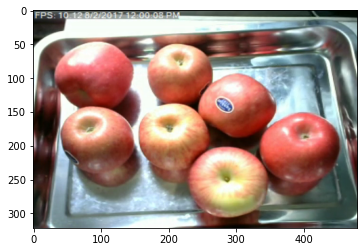

In [13]:
img = cv2.imread(df['Path'][1], cv2.COLOR_BGR2RGB)
img_GRB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_GRB)
#print(img_GRB)
plt.show()

In [ ]:
df.shape

In [ ]:
df

In [14]:
## Removing DS_store

for path in df.Path:
    count_to_drop = 0 
    if 'DS_Store'in str(path):
        df = df.drop(df.index[count_to_drop])
    count_to_drop = count_to_drop + 1
        

In [15]:
df

,Fruit,Path
0,Apple,/content/Apple/Apple A/Apple 269.png
1,Apple,/content/Apple/Apple A/Apple 146.png
2,Apple,/content/Apple/Apple A/Apple 662.png
3,Apple,/content/Apple/Apple A/Apple 462.png
4,Apple,/content/Apple/Apple A/Apple 106.png
...,...,...
70544,Tomatoes,/content/Tomatoes/Tamotoes008.png
70545,Tomatoes,/content/Tomatoes/Tamotoes00576.png
70546,Tomatoes,/content/Tomatoes/Tamotoes001450.png
70547,Tomatoes,/content/Tomatoes/Tamotoes001646.png


## Preping the data 

In [16]:
# Shuffling data

from sklearn.utils import shuffle

df = shuffle(df, random_state = 0)

df = df.reset_index(drop=True)

df

,Fruit,Path
0,Apple,/content/Apple/Apple B/532red applee03151532.png
1,Apple,/content/Apple/Apple F/Apple F _0_9674.png
2,Kiwi,/content/Kiwi/kiwi A/Kiwi A00978.png
3,Pomegranate,/content/Pomegranate/Pomegranet001235.png
4,Guava,/content/Guava/Guava total/GuavaуАВ1828 resize...
...,...,...
70544,Guava,/content/Guava/guava A/scene13281.png
70545,Mango,/content/Mango/Mango002551.png
70546,Kiwi,/content/Kiwi/kiwi A/Kiwi A001689.png
70547,Kiwi,/content/Kiwi/Kiwi C/Kiwi C0058.png


In [17]:
# adding a label to the data 

fruit_names = sorted(df.Fruit.unique())
mapper_fruit_names = dict(zip(fruit_names, [t for t in range(len(fruit_names))]))
df["label"] = df["Fruit"].map(mapper_fruit_names)
print(mapper_fruit_names)

# Visualize the resulting dataframe
df.head()

{'Apple': 0, 'Banana': 1, 'Carambola': 2, 'Guava': 3, 'Kiwi': 4, 'Mango': 5, 'Orange': 6, 'Peach': 7, 'Pear': 8, 'Persimmon': 9, 'Pitaya': 10, 'Plum': 11, 'Pomegranate': 12, 'Tomatoes': 13, 'muskmelon': 14}


,Fruit,Path,label
0,Apple,/content/Apple/Apple B/532red applee03151532.png,0
1,Apple,/content/Apple/Apple F/Apple F _0_9674.png,0
2,Kiwi,/content/Kiwi/kiwi A/Kiwi A00978.png,4
3,Pomegranate,/content/Pomegranate/Pomegranet001235.png,12
4,Guava,/content/Guava/Guava total/GuavaуАВ1828 resize...,3


# Preping to model

In [ ]:
# Reshaping the image

In [18]:
def load_img(df):
# Load the images using their contained in the dataframe df
# Return a list of images and a list with the labels of the images
    img_paths = df["Path"].values
    img_labels = df["Fruit"].values
    X = []
    y = []
    
    for i,path in enumerate(img_paths):
        img =  cv2.imread(path)
        img = cv2.resize(img, (150,150))
        label = img_labels[i]
        X.append(img)
        y.append(label)
    return np.array(X),np.array(y)




In [19]:
X, y = load_img(df)

In [20]:
y.shape

(70549,)

In [21]:
length = len(mapper_fruit_names)
length

15

In [22]:
y

array(['Apple', 'Apple', 'Kiwi', ..., 'Kiwi', 'Kiwi', 'Pomegranate'],
      dtype='<U11')

In [23]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

y = le.fit_transform(y)

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)



In [25]:
X_train.shape

(63494, 150, 150, 3)

In [11]:
shape_img = (150,150,3)

In [27]:
y_train

array([ 4,  4,  5, ...,  3, 10,  3])

In [12]:
import tensorflow as tf
from tensorflow.keras import layers
  
model =  tf.keras.models.Sequential([

        tf.keras.layers.Conv2D(32 ,(3,3), activation = 'relu', input_shape = shape_img, padding = 'same'),
        tf.keras.layers.MaxPooling2D(2,2),

        tf.keras.layers.Conv2D(64 ,(3,3), activation = 'relu',padding = 'same'),
        tf.keras.layers.MaxPooling2D(2,2),

        tf.keras.layers.Conv2D(64 ,(3,3), activation = 'relu', padding = 'same'),
        tf.keras.layers.MaxPooling2D(2,2),

        tf.keras.layers.Conv2D(64 ,(3,3), activation = 'relu', padding = 'same'),
        tf.keras.layers.MaxPooling2D(2,2),

        tf.keras.layers.Conv2D(64 ,(3,3), activation = 'relu', padding = 'same'),
        tf.keras.layers.MaxPooling2D(2,2),

        tf.keras.layers.Conv2D(32 ,(3,3), activation = 'relu', padding = 'same'),
        tf.keras.layers.MaxPooling2D(2,2),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(15, activation = 'softmax')

                                     
])



model.summary()
#stocastic_??
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 18, 18, 64)        3

In [29]:
X_train.shape

(63494, 150, 150, 3)

In [30]:
y_train.shape


(63494,)

In [13]:
# history = model.fit(X_train, y_train, 
#                     validation_data = (X_test, y_test),
#                     epochs=5 )
history = model.fit(train_generator,epochs=5)

Epoch 1/5
552/552 [==============================] - 508s 863ms/step - loss: 1.4798 - accuracy: 0.5245
Epoch 2/5
552/552 [==============================] - 449s 812ms/step - loss: 0.2181 - accuracy: 0.9233
Epoch 3/5
552/552 [==============================] - 431s 780ms/step - loss: 0.1212 - accuracy: 0.9560
Epoch 4/5
552/552 [==============================] - 424s 768ms/step - loss: 0.0961 - accuracy: 0.9664
Epoch 5/5
552/552 [==============================] - 433s 784ms/step - loss: 0.0706 - accuracy: 0.9746


In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
imgs_generator = ImageDataGenerator(rescale=1/255)
train_generator = imgs_generator.flow_from_directory(
        '/content/fruit',  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')


Found 70549 images belonging to 15 classes.
